In [1]:
import numpy as np
from scipy import stats
from keras import models
import h5py
import matplotlib.pyplot as plt

from utils import RandomSeedResetter
RandomSeedResetter.reset_random_seed(0)

Using TensorFlow backend.


In [2]:
input_test = np.load('data/lorenz/input_test.npy')
input_test_mlp = np.load('data/lorenz/input_test_mlp.npy')
output_test = np.load('data/lorenz/output_test.npy')
DIM_OUTPUT = len(output_test[0, :])

print('Test : ',  input_test.shape,  output_test.shape)
print('Test of MLP : ',  input_test_mlp.shape,  output_test.shape)

Test :  (10000, 225, 32) (10000, 32)
Test of MLP :  (10000, 256) (10000, 32)


In [3]:
model_mlp = models.load_model('model/mlp_lorenz/model_check_mlp.h5')
model_rnn = models.load_model('model/mlp_lorenz/model_check_rnn.h5')
model_lstm = models.load_model('model/mlp_lorenz/model_check_lstm.h5')
model_gru = models.load_model('model/mlp_lorenz/model_check_gru.h5')

In [4]:
output_test_mlp = model_mlp.predict(input_test_mlp[:, :])
output_test_rnn = model_rnn.predict(input_test[:, :, :])
output_test_lstm = model_lstm.predict(input_test[:, :, :])
output_test_gru = model_gru.predict(input_test[:, :, :])

error_test_mlp = output_test[:, :]-output_test_mlp[:, :]
error_test_rnn = output_test[:, :]-output_test_rnn[:, :]
error_test_lstm = output_test[:, :]-output_test_lstm[:, :]
error_test_gru = output_test[:, :]-output_test_gru[:, :]

squared_error_test_mlp = np.square(error_test_mlp[:, :])
squared_error_test_rnn = np.square(error_test_rnn[:, :])
squared_error_test_lstm = np.square(error_test_lstm[:, :])
squared_error_test_gru = np.square(error_test_gru[:, :])

mse_test_mlp = np.average(squared_error_test_mlp[:, :], axis=0)
mse_test_rnn = np.average(squared_error_test_rnn[:, :], axis=0)
mse_test_lstm = np.average(squared_error_test_lstm[:, :], axis=0)
mse_test_gru = np.average(squared_error_test_gru[:, :], axis=0)

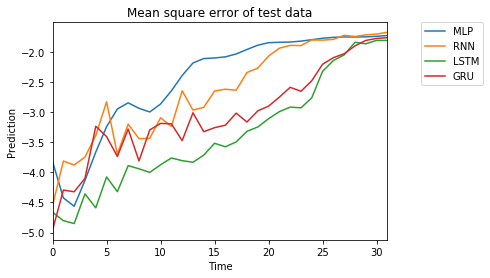

In [5]:
# Plot training & validation loss values
plt.figure()
plt.title('Mean square error of test data')

plt.ylabel('Prediction')
plt.xlabel('Time')

plt.plot(np.log(mse_test_mlp[:]), label='MLP')
plt.plot(np.log(mse_test_rnn[:]), label='RNN')
plt.plot(np.log(mse_test_lstm[:]), label='LSTM')
plt.plot(np.log(mse_test_gru[:]), label='GRU')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.xlim(0, DIM_OUTPUT-1)
plt.show()

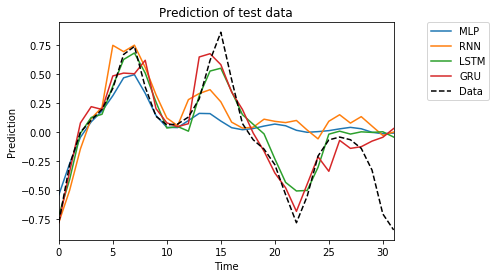

In [6]:
# Plot test & validation loss values
plt.figure()
plt.title('Prediction of test data')

plt.ylabel('Prediction')
plt.xlabel('Time')

idx = 0
plt.plot(output_test_mlp[idx, :], label='MLP')
plt.plot(output_test_rnn[idx, :], label='RNN')
plt.plot(output_test_lstm[idx, :], label='LSTM')
plt.plot(output_test_gru[idx, :], label='GRU')
plt.plot(output_test[idx, :], label='Data', color='black', linestyle='dashed')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.xlim(0, DIM_OUTPUT-1)
plt.show()

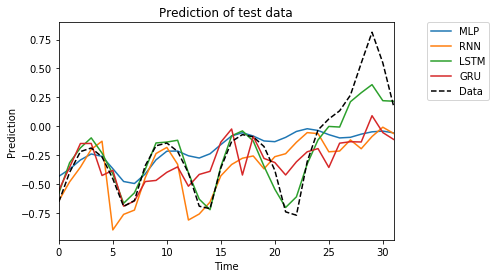

In [7]:
# Plot test & validation loss values
plt.figure()
plt.title('Prediction of test data')

plt.ylabel('Prediction')
plt.xlabel('Time')

idx = len(input_test[:])-1
plt.plot(output_test_mlp[idx, :], label='MLP')
plt.plot(output_test_rnn[idx, :], label='RNN')
plt.plot(output_test_lstm[idx, :], label='LSTM')
plt.plot(output_test_gru[idx, :], label='GRU')
plt.plot(output_test[idx, :], label='Data', color='black', linestyle='dashed')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.xlim(0, DIM_OUTPUT-1)
plt.show()

In [8]:
np.save('result/mlp_lorenz/mse_test_mlp.npy', mse_test_mlp)
np.save('result/mlp_lorenz/mse_test_rnn.npy', mse_test_rnn)
np.save('result/mlp_lorenz/mse_test_lstm.npy', mse_test_lstm)
np.save('result/mlp_lorenz/mse_test_gru.npy', mse_test_gru)

np.save('result/mlp_lorenz/output_test_mlp.npy', output_test_mlp)
np.save('result/mlp_lorenz/output_test_rnn.npy', output_test_rnn)
np.save('result/mlp_lorenz/output_test_lstm.npy', output_test_lstm)
np.save('result/mlp_lorenz/output_test_gru.npy', output_test_gru)